In [305]:
# !pip install ipynb
import ipynb.fs.full.general_model_pipeline_vl as gmp

# packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from scipy.stats import randint

#### Setting aside some testing data first:

This code uses 80% for training data, 20% for testing data.

In [306]:
# set the seed for reproducibility
rs = 100
np.random.seed(100)

# frac train
train_size = 0.8

#### Original Food Data

In [307]:
data = pd.read_csv('../../data/nu3-pctfoodsupply-CO2-emissions.csv').drop(columns=['Unnamed: 0'])
data.head()

,Country,porksupply,chickensupply,beefsupply,lambsupply,fishsupply,eggsupply,milkcheesesupply,wheatprodsupply,ricesupply,soybeansupply,nutssupply,totalco2
0,Argentina,10.51,38.66,55.48,1.56,4.36,11.39,195.08,103.11,8.77,0.00,0.49,2172.40
1,Australia,24.14,46.12,33.86,9.87,17.69,8.51,234.49,70.46,11.03,0.19,8.73,1938.64
2,Albania,10.88,13.23,22.50,15.32,3.85,12.45,303.72,138.64,7.78,0.00,4.36,1777.84
3,Iceland,21.69,26.87,13.36,21.12,74.41,8.24,225.82,72.92,3.89,0.11,3.88,1731.35
4,New Zealand,22.29,34.98,22.49,18.91,20.36,9.91,137.25,76.91,9.16,0.44,8.22,1750.94


In [308]:
train_data = data.sample(frac=train_size)
test_data = data[data['Country'].apply(lambda x: x not in train_data['Country'].values)]

train_data.drop(columns='Country', inplace=True)
test_data.drop(columns='Country', inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [309]:
train_data.shape, test_data.shape

((104, 12), (26, 12))

#### Normalized Food Data

This is the second food dataset that I created from my Data Cleaning/EDA notebook where I scaled all the countries to have a totalsupply of 491.15 and converted the columns to percentages.

In [310]:
data_norm = pd.read_csv('../../data/nu3-pctfoodsupply-CO2-emissions-norm.csv').drop(columns=['Unnamed: 0'])
data_norm.head()

,Country,porksupply_pct,chickensupply_pct,beefsupply_pct,lambsupply_pct,fishsupply_pct,eggsupply_pct,milkcheesesupply_pct,wheatprodsupply_pct,ricesupply_pct,soybeansupply_pct,nutssupply_pct,totalco2_norm
0,Argentina,0.024475,0.090031,0.129201,0.003633,0.010153,0.026525,0.454298,0.240120,0.020423,0.000000,0.001141,2484.744789
1,Australia,0.051904,0.099164,0.072803,0.021222,0.038036,0.018298,0.504182,0.151498,0.023716,0.000409,0.018771,2047.266198
2,Albania,0.020423,0.024834,0.042235,0.028758,0.007227,0.023370,0.570120,0.260244,0.014604,0.000000,0.008184,1639.078175
3,Iceland,0.045923,0.056891,0.028287,0.044716,0.157545,0.017446,0.478118,0.154390,0.008236,0.000233,0.008215,1800.411917
4,New Zealand,0.061759,0.096919,0.062313,0.052394,0.056411,0.027458,0.380278,0.213094,0.025380,0.001219,0.022775,2382.727976


In [311]:
train_data_norm = data_norm.sample(frac=train_size)
test_data_norm = data_norm[data_norm['Country'].apply(lambda x: x not in train_data_norm['Country'].values)]

train_data_norm.drop(columns='Country', inplace=True)
test_data_norm.drop(columns='Country', inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [312]:
train_data_norm.shape, test_data_norm.shape

((104, 12), (26, 12))

---

## Forecasting and Prediction Modeling (25 points)

In this section, we fit four machine learning models:
- Simple Linear Regression
- LASSO Regression
- Decision Tree
- Random Forest

### Prediction Model 1a: Simple Linear Regression on Original Data

We first fit a simple linear regression model as a simple test run on our data. Since our true model is linear, we expect this to fit very well.

Splitting data...
Fitting Model...
[Train MSE: 0.0]
[Train R^2: 0.9999999998924609]
[Test MSE: 0.0]
[Test R^2: 0.9999999998924609]
----FINISHED----


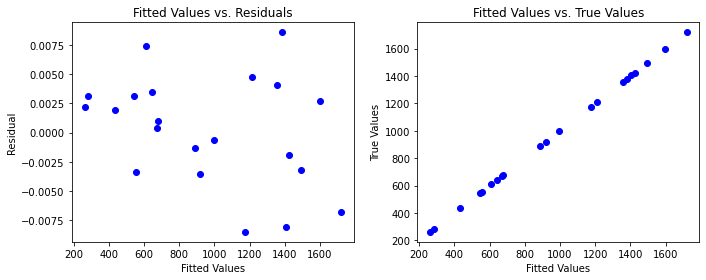

In [313]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'totalco2')

lr_model = LinearRegression()
lr_model = gmp.run_model(X_train, X_val, y_train, y_val, lr_model, diagnostics=True)

In [314]:
# we get back the conversion rates with linear regression
conversion_rates = pd.DataFrame(lr_model.coef_, train_data.columns[:-1], columns=['Model Coefs'])

# from https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018
conversion_rates['True Rates'] = [3.54, 1.07, 30.86, 35.02, 1.60, 0.92, 1.42, 0.19, 1.28, 0.45, 1.77]
conversion_rates

,Model Coefs,True Rates
porksupply,3.539499,3.54
chickensupply,1.074214,1.07
beefsupply,30.857873,30.86
lambsupply,35.019835,35.02
fishsupply,1.596679,1.60
eggsupply,0.918552,0.92
milkcheesesupply,1.424405,1.42
wheatprodsupply,0.190708,0.19
ricesupply,1.279691,1.28
soybeansupply,0.450558,0.45


And as a result, our model reverse engineers the conversion rates [nu3](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) uses to produce the data.

### Prediction Model 1b: Simple Linear Regression on Normalized Data

We try this again with our normalize data to confirm that our data transformation did not ruin the relationship between covariates and response variable. We can then use this model to predict an individual's carbon footprint based on their diet composition instead of the raw supply values.

Splitting data...
Fitting Model...
[Train MSE: 0.0001]
[Train R^2: 0.9999999985514861]
[Test MSE: 0.0002]
[Test R^2: 0.9999999985514861]
----FINISHED----


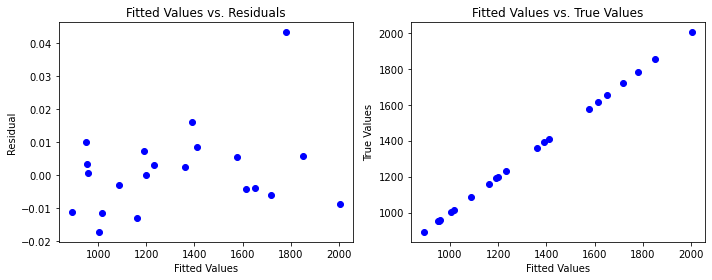

In [315]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data_norm, 'totalco2_norm')

lr_model_norm = LinearRegression()
lr_model_norm = gmp.run_model(X_train, X_val, y_train, y_val, lr_model_norm, diagnostics=True)

In [316]:
pd.DataFrame(lr_model_norm.coef_, train_data_norm.columns[:-1]).sort_values(by=0, axis=0)

,0
wheatprodsupply_pct,-3394.521830
soybeansupply_pct,-3266.776056
eggsupply_pct,-3036.922061
chickensupply_pct,-2960.550755
ricesupply_pct,-2859.661826
milkcheesesupply_pct,-2788.573188
fishsupply_pct,-2703.969147
nutssupply_pct,-2618.703925
porksupply_pct,-1749.758535
beefsupply_pct,11667.603456


These weighted coefficients show the relative relationships between the covariates and the normalized CO2 emissions. 

---

### Prediction Model 2: Lasso Regression

We expect LASSO regression to have little affect our model, and produce a very small alpha value. This is because our dataset's true model is a linear model, and is calculated from all of the covariates we have in the dataset, and none of them need to be removed. We should be perfectly fitting a linear model, so any regularization should worsen the model. We test a wide range of possible alpha values just in case.

In [317]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data_norm, 'totalco2_norm', standardize = True)

alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gmp.linreg_kfold_cv(LassoCV, X_train, X_val, y_train, y_val, alphas)

Splitting data...
optimal alpha: 0.0
Test MSE with cross-validated LassoCV: 0.0013127268269577936
[R^2: 0.9999999879601554]


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linea

0.0

We do in fact see that the optimal alpha is 0.0, which is in line with what theoretically should happen.

---

### Prediction Model 3: Decision Tree

Since a decision tree does not produce a linear boundary, we suspect that the decision tree cannot fit as well as the linear regression model, knowing that our true, underlying relationship is linear. We run this model to test our theoretical understanding of the underlying relationship in the variables. We choose this `param_dist` because we do not want our model to overfit, so we limit to 20 leaf nodes and depth 10 (as there's only 11 features total). We expect our model to want to use all the faetures, so we let max_features range up to the maximum number of possible features.

In [260]:
param_dist = {'max_leaf_nodes': np.arange(2, 20),
              'max_features': np.arange(2, X_train.shape[1] + 1),
              'max_depth': np.arange(2,10)}

tree = DecisionTreeRegressor(random_state = rs, max_depth = 4, max_features=5, max_leaf_nodes=10)
gmp.tree_kfold_cv(tree, param_dist, X_train, y_train, n_iter=1000, random_state = rs)

0.8438105303284944
{'max_leaf_nodes': 18, 'max_features': 11, 'max_depth': 4}


Splitting data...
Fitting Model...
[Train MSE: 6796.4168]
[Train R^2: 0.795409387862389]
[Test MSE: 39745.2939]
[Test R^2: 0.795409387862389]
----FINISHED----


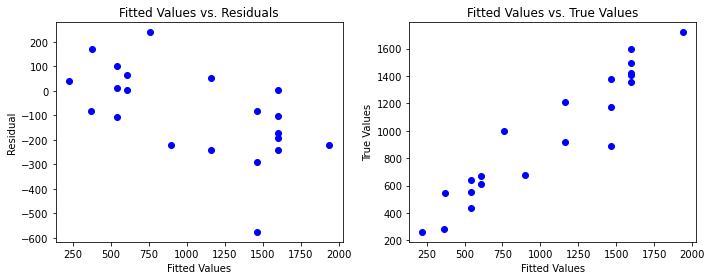

In [261]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'totalco2', standardize = False)

tree_model = DecisionTreeRegressor(random_state=rs, max_depth=4)
tree_model = gmp.run_model(X_train, X_val, y_train, y_val, tree_model, diagnostics=True)

Our decision tree does not fit nearly as well as our linear regression, having a much larger test MSE and .79 $R^2$ value. We see that the fitted values have some variance in their values for similar true values, whereas the previous linear regression models are much more tightly fit.

---

### Prediction Model 4: Random Forest

We try a random forest for kicks and to see if it can outperform the single decision tree.

Fitting Model...
[Train MSE: 5108.6423]
[Train R^2: 0.9316168037237174]
[Test MSE: 13284.6283]
[Test R^2: 0.9316168037237174]
----FINISHED----


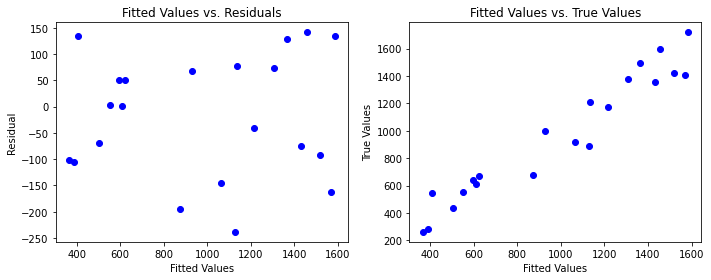

In [262]:
forest_model = RandomForestRegressor(n_estimators = 500, random_state = rs, max_depth = 5)
forest_model = gmp.run_model(X_train, X_val, y_train, y_val, forest_model, diagnostics=True)

Our random forest performs a bit better, probably because the decision boundary is less rigid than a single decision tree. The ensemble model can fit to the linear decision boundary much more easily this way. In comparison to the single decision tree, the random forest also has less variance for similar true values, indicating better fit.

### Comparing all four models on the Test Set

In [263]:
X_test = test_data.drop(columns='totalco2')
y_test = test_data['totalco2']

X_test_norm = test_data_norm.drop(columns='totalco2_norm')
y_test_norm = test_data_norm['totalco2_norm']

In [297]:
lr_test_preds = lr_model.predict(X_test)
lr_norm_test_preds = lr_model_norm.predict(X_test_norm)
tree_test_preds = tree_model.predict(X_test)
forest_test_preds = forest_model.predict(X_test)


{'Linear Regression' : mean_squared_error(lr_test_preds, y_test),
 'Linear Regression Normalized' : mean_squared_error(lr_norm_test_preds, y_test_norm),
 'Decision Tree' : mean_squared_error(tree_test_preds, y_test),
 'Random Forest' : mean_squared_error(forest_test_preds, y_test)}

{'Linear Regression': 1.4610674244335816e-05,
 'Linear Regression Normalized': 0.00014286583596707927,
 'Decision Tree': 29625.08944602313,
 'Random Forest': 11751.119769403102}

---

## Interpretation and Conclusions (20 points)

Our original prediction problem for this model was to predict an individual's CO2 emissions per year given the composition of their diet. This model would then be used to inform policy-decisions for the agriculture industry, which can help curb our carbon footprint. On a more local scale, individuals can quickly see their carbon footprint based on their diet, and reallocate their resources (i.e. alter their diet) in a way that reduces their carbon footprint, perhaps by being more mindful at the supermarket.

Through looking at the linear regression coefficients or decision tree splits, we are able to see which factors are the largest contributors to the individual's carbon footprint. Though in hindsight, this requires casual inference and is not a pure prediction problem, this is also justified as we know that there is a causal relationship in our data.

However, the causal relationship also describes our main caveat to our model as well. The dataset we used was generated from a linear, causal relationship. As a result, our linear model performed perfectly, and essentially fit the data in a way where the coefficients extracted that linear relationship back out. In this sense, **our model is not useful for this dataset as the relationship between the covariates and response variable is already known/defined.** We saw further proof of this in that our LASSO model chose $\lambda=0$  as there was no overfitting. In other words, using the chart at the beginning of the input data description section, one could estimate their own carbon footprint directly, and our prediction problem is essentially nullified.

We look at our normalized linear model coefficients to examine the relative influence of the features on our carbon footprint.

In [265]:
lr_model_norm.intercept_

3488.1707953058294

In [296]:
norm_coefs = pd.DataFrame(lr_model_norm.coef_, train_data_norm.columns[:-1]).sort_values(by=0, axis=0)
norm_coefs.columns = ['Model Coefficient']
norm_coefs

,Model Coefficient
wheatprodsupply_pct,-3394.521830
soybeansupply_pct,-3266.776056
eggsupply_pct,-3036.922061
chickensupply_pct,-2960.550755
ricesupply_pct,-2859.661826
milkcheesesupply_pct,-2788.573188
fishsupply_pct,-2703.969147
nutssupply_pct,-2618.703925
porksupply_pct,-1749.758535
beefsupply_pct,11667.603456


We see that after normalizing our data, all products other than beef and lamb have a negative relationship with `totalco2_norm`. This underscores how bad beef and lamb are for our environment, as those two simply outweigh the the cost of every other food group.

*Note: After normalization, our data dose not have units, so the negative coefficients do NOT mean that those food decrease an individual's carbon emissions. It is only useful to look at the relative relationships.*

The issue with the original data format is if someone wanted to use this model to predict their carbon footprint, that an individual likely does not know their exact amount in kilograms of each food they consume. We fixed this issue by normalizing the data in a way where the covariates now represent percentages of their diet. Using this normalized dataset, an individual can more easily estimate their carbon footprint. This normalization also assumes that the individual consumes the average American annual total supply of food in kilograms, which is 491.15 kilograms of food (limited to foods included in the dataset).

Now, for instance, if I think that my food intake follows this composition:

In [267]:
# try inserting your own estimated diet composition!
user_diet = {'pork' : 0.05,
             'chicken' : 0.1,
             'beef' : 0.05,
             'lamb' : 0.02,
             'fish' : 0.025,
             'eggs' : 0.05,
             'milk&cheese': 0.2,
             'wheat' : 0.2,
             'rice' : 0.2,
             'soybeans' : 0.1,
             'nuts' : 0.005}

# make sure your diet adds up to 1.0
sum(user_food.values())

1.0

Then I can predict my carbon footprint using our best model:

In [82]:
predicted_co2_emissions_per_year = lr_model_norm.predict(np.reshape(list(user_diet.values()), (1,11)))[0]
print('Your diet produces', np.round(predicted_co2_emissions_per_year, 2), 'kilograms of CO2 emissions per year.')

Your diet produces 1594.48 kilograms of CO2 emisisons per year.


In [268]:
def country_diet(country_name):
    diet = data_norm.loc[data['Country'] == country_name].drop(columns=['Country', 'totalco2_norm']).to_numpy()
    prediction = lr_model_norm.predict(diet)[0]
    print('According to our model, the diet of the average person in', country_name, 'produces', np.round(prediction, 2), 
          'kilograms of CO2 emisisons per year.')

In [269]:
print('Possible countries:', data['Country'].sort_values().to_list())

Possible countries: ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Honduras', 'Hong Kong SAR. China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia', 'Liberia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Caledonia', '

In [278]:
# try me!
country_diet('Peru')

According to our model, the diet of the average person in Peru produces 919.43 kilograms of CO2 emisisons per year.


*Again, note that this prediction assumes that you consume the average annual total supply of food in kilograms of an American, i.e. 491.15 kilograms of food.*

In conclusion, though the model is uninteresting in terms of the prediction problem, the dataset was a good exercise through seeing how the various machine learning models should perform in theory and in practice.

Knowing that our dataset was produced from a linear model, we do in fact find that our linear regression does perform perfectly. On the other hand, our decision trees and random forests performed more poorly as they could not replicate the linear relationship.